# Análise de Séries Temporais

Este projeto foi desenvolvido como objeto de estudo para análise de séries temporais, baseado na formação "Python para Data Science" da Alura. As bases de dados aqui utilizadas podem ser encontradas na pasta "data"

## Vendas "Alucar"

In [1]:
import pandas as pd

In [2]:
alucar_dataset = pd.read_csv('data/alucar.csv')

In [4]:
alucar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [6]:
alucar_dataset.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


O dataset é pequeno, com 24 registros, sem registros nulos. É importante que os dados na coluna 'mês' sejam do tipo datetime

In [7]:
alucar_dataset['mes'] = pd.to_datetime(alucar_dataset['mes'])

In [8]:
alucar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Visualizando o progresso das vendas

Text(0, 0.5, 'Vendas (R$)')

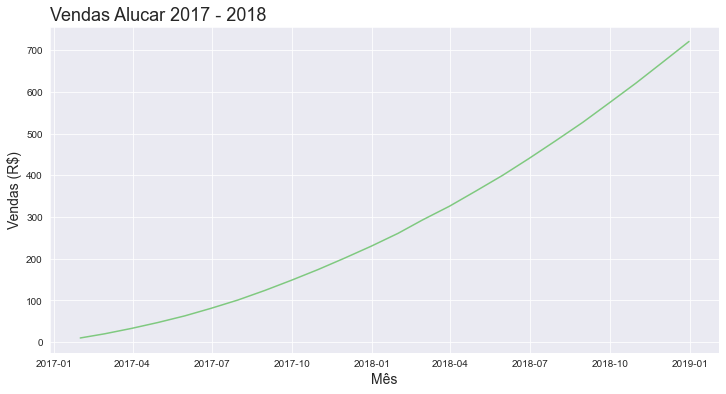

In [21]:
sns.set_palette('Accent') #define paleta de cores
sns.set_style('darkgrid') #define um estilo de grid

vendas_alucar = sns.lineplot(x='mes', y='vendas', data=alucar_dataset) #cria o gráfico

vendas_alucar.figure.set_size_inches(12, 6) #configura o tamanho do gráfico
vendas_alucar.set_title('Vendas Alucar 2017 - 2018', loc='left', fontsize=18) #cria o título no canto esquerdo com fonte 18
vendas_alucar.set_xlabel('Mês', fontsize=14)
vendas_alucar.set_ylabel('Vendas (R$)', fontsize=14)

Visualmente, as vendas da Alucar crescem mês a mês

### Calculando aumento entre os meses

In [22]:
alucar_dataset['aumento_no_mes'] = alucar_dataset['vendas'].diff()

alucar_dataset.head()

,mes,vendas,aumento_no_mes
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


Text(0, 0.5, 'Aumento das vendas (R$)')

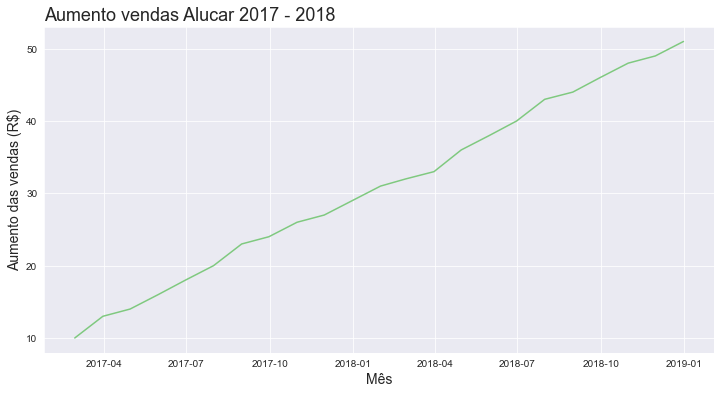

In [24]:
sns.set_palette('Accent') #define paleta de cores
sns.set_style('darkgrid') #define um estilo de grid

aumento_vendas_alucar = sns.lineplot(x='mes', y='aumento_no_mes', data=alucar_dataset) #cria o gráfico

aumento_vendas_alucar.figure.set_size_inches(12, 6) #configura o tamanho do gráfico
aumento_vendas_alucar.set_title('Aumento vendas Alucar 2017 - 2018', loc='left', fontsize=18) #cria o título no canto esquerdo com fonte 18
aumento_vendas_alucar.set_xlabel('Mês', fontsize=14)
aumento_vendas_alucar.set_ylabel('Aumento das vendas (R$)', fontsize=14)

In [42]:
#Definindo função para plotagem
def plotar(x, y, dataset, title, xlabel, ylabel):
    sns.set_palette('Accent') #define paleta de cores
    sns.set_style('darkgrid') #define um estilo de grid

    plot = sns.lineplot(x=x, y=y, data=dataset) #cria o gráfico

    plot.figure.set_size_inches(12, 6) #configura o tamanho do gráfico
    plot.set_title(title, loc='left', fontsize=18) #cria o título no canto esquerdo com fonte 18
    plot.set_xlabel(xlabel, fontsize=14)
    plot.set_ylabel(ylabel, fontsize=14)

### Calculando aceleração do crescimento

In [43]:
alucar_dataset['aceleracao'] = alucar_dataset['aumento_no_mes'].diff()

alucar_dataset.head()

,mes,vendas,aumento_no_mes,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


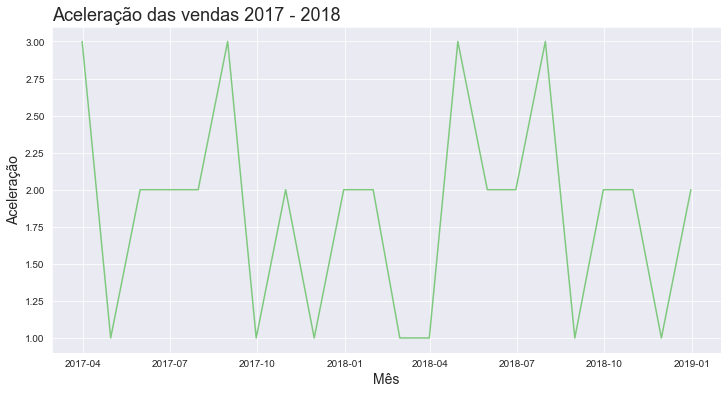

In [44]:
plotar('mes', 'aceleracao', alucar_dataset, 'Aceleração das vendas 2017 - 2018', 'Mês', 'Aceleração')

### Juntando os gráficos num mesmo lugar

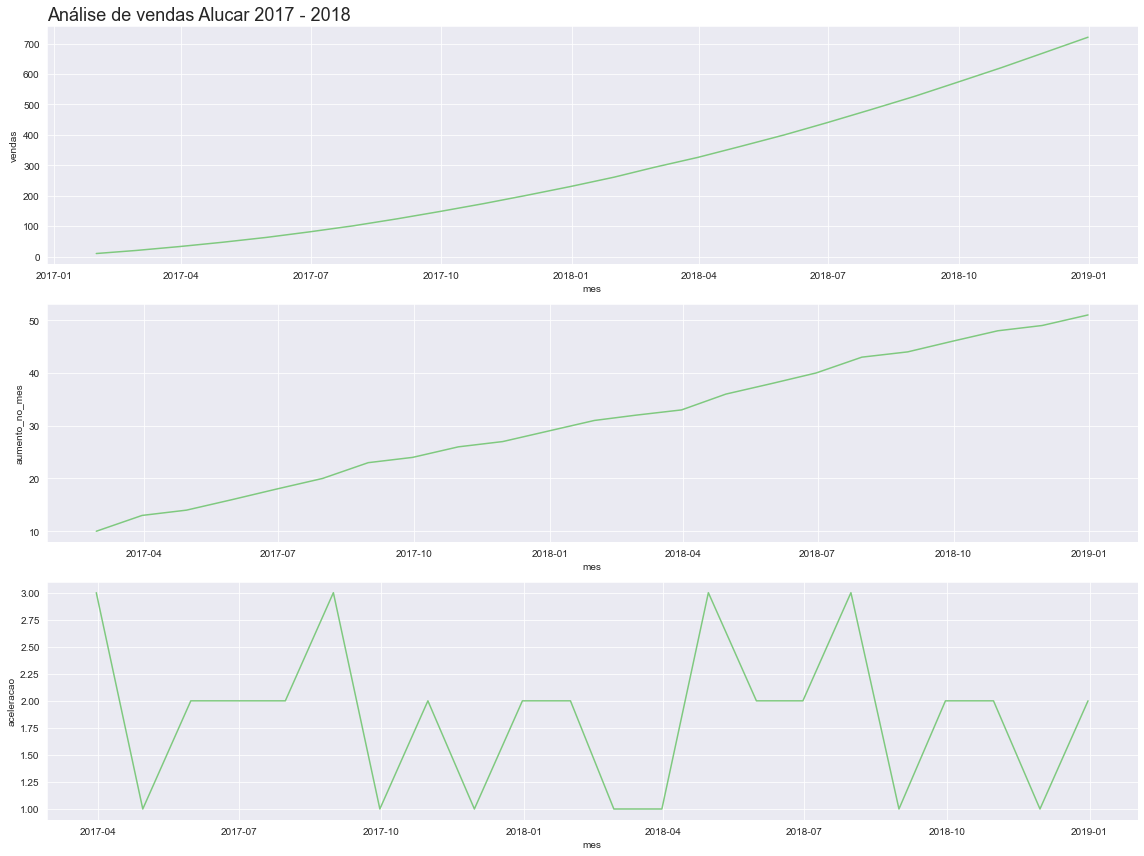

In [50]:
plt.figure(figsize=(16,12)) #cria uma figura
ax = plt.subplot(3,1,1) #cria um subplot de 3 linhas 1 coluna usando a posição 1

ax.set_title('Análise de vendas Alucar 2017 - 2018', loc='left', fontsize=18) #título geral

sns.lineplot(x='mes', y='vendas', data=alucar_dataset)

plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento_no_mes', data=alucar_dataset)

plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar_dataset)

plt.tight_layout() #ajusta o espaço entre os plots

ax=ax

In [51]:
#criando função para reprodução da figura montada na célula anterior

def plot_comparacao(x, y1, y2, y3, dataset, title):
    plt.figure(figsize=(16,12)) #cria uma figura
    ax = plt.subplot(3,1,1) #cria um subplot de 3 linhas 1 coluna usando a posição 1

    ax.set_title(title, loc='left', fontsize=18) #título geral

    sns.lineplot(x=x, y=y1, data=dataset)

    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)

    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

    plt.tight_layout() #ajusta o espaço entre os plots

    ax=ax    

### Autocorrelação

In [53]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

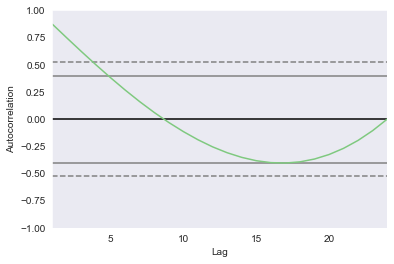

In [54]:
autocorrelation_plot(alucar_dataset['vendas'])

Os primeiros 7 dias têm uma correlação mais forte para as vendas

## Newsletter "Alucar"

In [55]:
news_dataset = pd.read_csv('data/newsletter_alucar.csv')

In [56]:
news_dataset.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [57]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [58]:
news_dataset['mes'] = pd.to_datetime(news_dataset['mes'])

In [59]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   mes         24 non-null     datetime64[ns]
 1   assinantes  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [60]:
news_dataset['aumento'] = news_dataset['assinantes'].diff()
news_dataset['aceleracao'] = news_dataset['aumento'].diff()

news_dataset.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


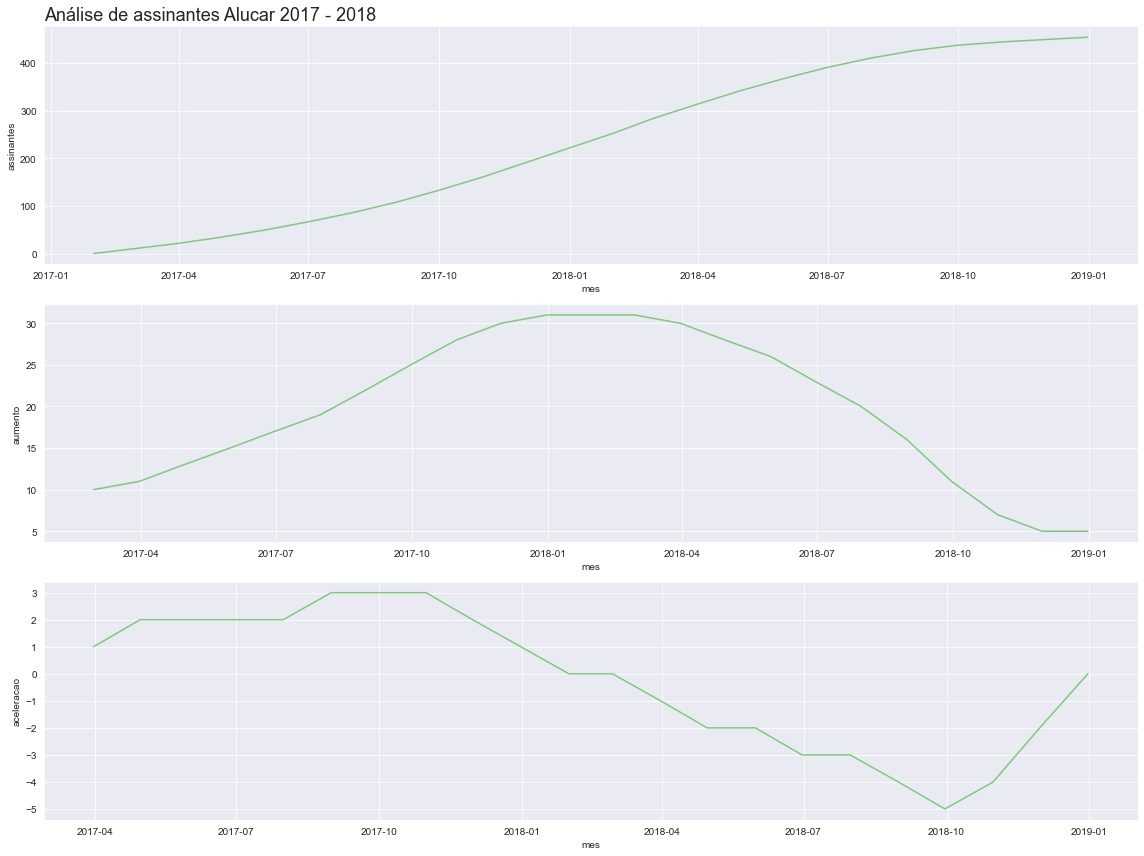

In [61]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', news_dataset, 'Análise de assinantes Alucar 2017 - 2018')

## Chocolura

In [62]:
chocolura = pd.read_csv('data/chocolura.csv')

In [63]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [64]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [65]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [68]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [69]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


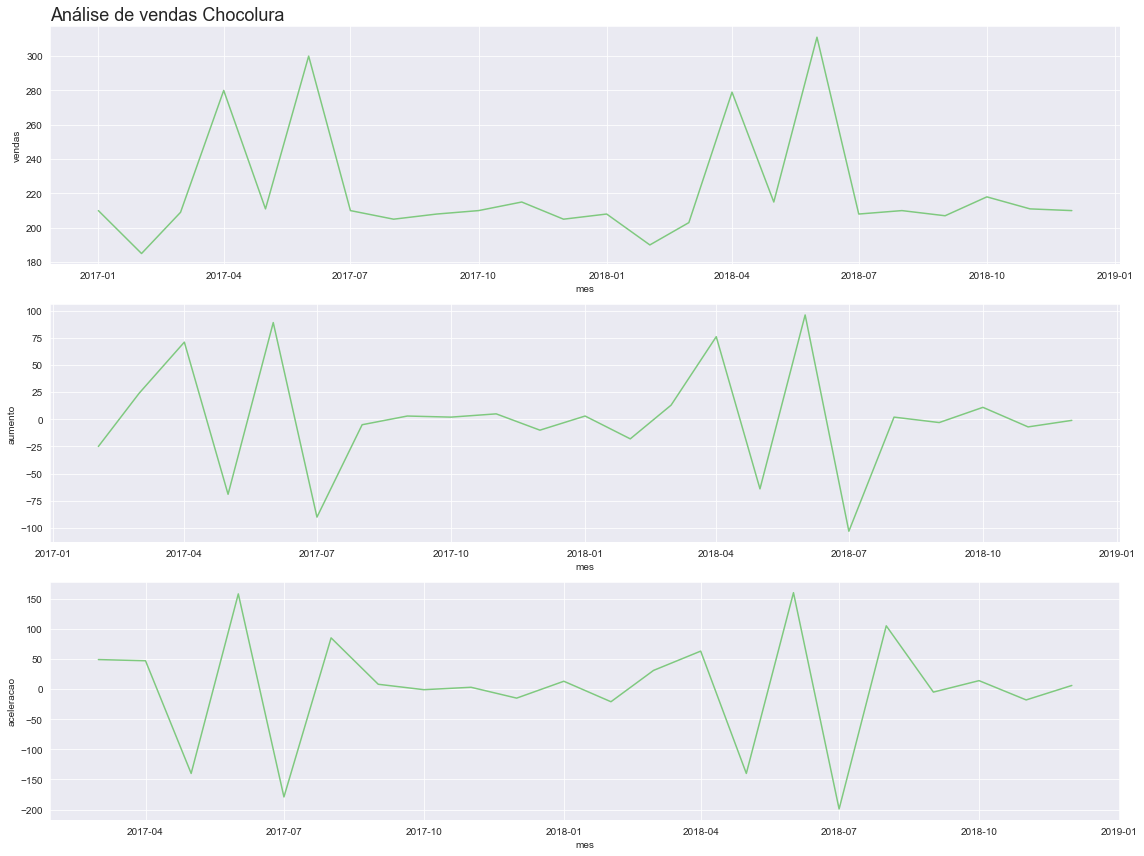

In [71]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas Chocolura')

### Vendas diárias

In [72]:
chocolura_vendas_diarias = pd.read_csv('data/vendas_por_dia.csv')

In [73]:
chocolura_vendas_diarias.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [74]:
chocolura_vendas_diarias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [76]:
chocolura_vendas_diarias['dia'] = pd.to_datetime(chocolura_vendas_diarias['dia'])

In [77]:
chocolura_vendas_diarias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [79]:
chocolura_vendas_diarias['aumento'] = chocolura_vendas_diarias['vendas'].diff()
chocolura_vendas_diarias['aceleracao'] = chocolura_vendas_diarias['aumento'].diff()

chocolura_vendas_diarias.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


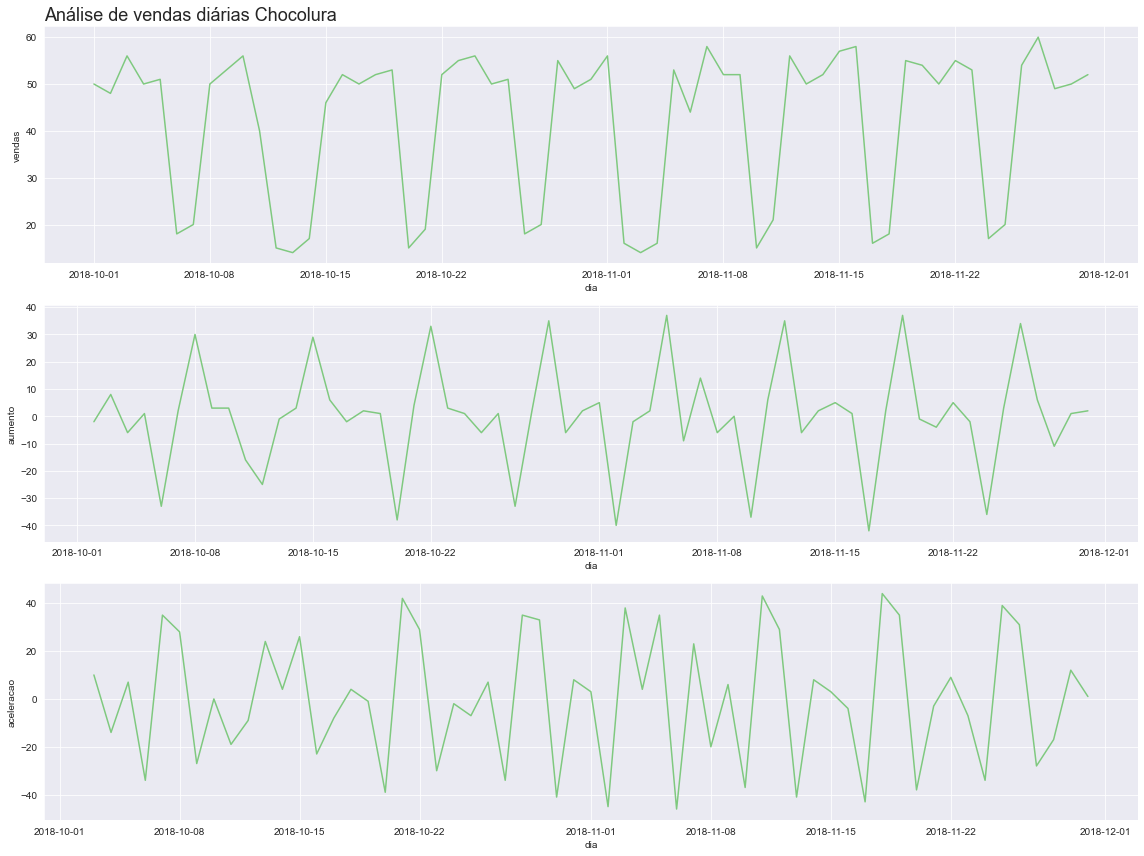

In [80]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', chocolura_vendas_diarias, 'Análise de vendas diárias Chocolura')

In [85]:
#identificando os dias da semana:
chocolura_vendas_diarias['dia_da_semana'] = chocolura_vendas_diarias['dia'].dt.day_name()

chocolura_vendas_diarias['dia_da_semana'] = chocolura_vendas_diarias['dia_da_semana'].map({
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
})

chocolura_vendas_diarias.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [89]:
(chocolura_vendas_diarias.groupby(['dia_da_semana']).mean()[['vendas', 'aumento', 'aceleracao']]).round(2)

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,18.88,3.00,30.75
Quarta,53.11,1.44,2.11
Quinta,51.33,-1.78,-3.22
Segunda,52.33,33.75,30.75
Sexta,44.56,-6.78,-5.00
Sábado,15.88,-27.75,-19.88
Terça,51.67,-0.67,-34.25


## Cafelura

In [90]:
cafelura = pd.read_csv('data/cafelura.csv')

In [91]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [92]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [93]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [94]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


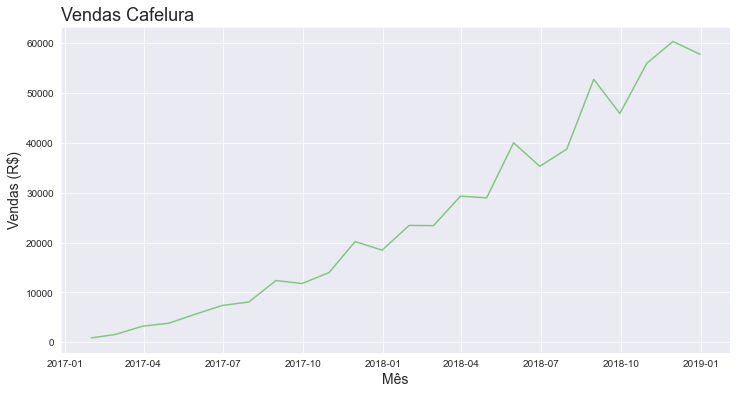

In [95]:
plotar('mes', 'vendas', cafelura, 'Vendas Cafelura', 'Mês', 'Vendas (R$)' )

### Normalização por quantidade de finais de semana

In [96]:
finais_de_semana = pd.read_csv('data/dias_final_de_semana.csv')

In [100]:
finais_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [98]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/finais_de_semana['quantidade_de_dias'].values

cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


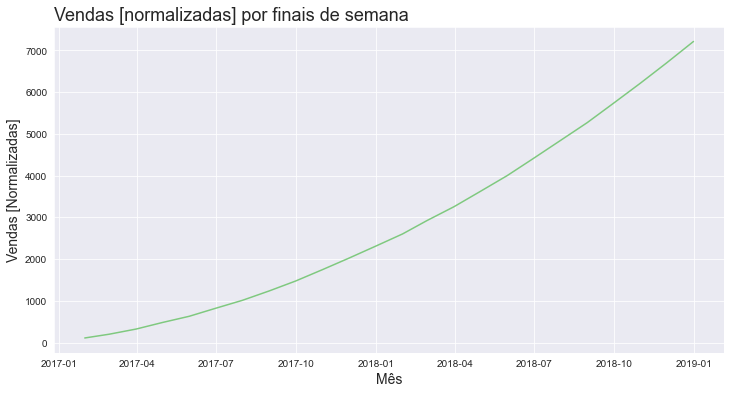

In [101]:
plotar('mes', 'vendas_normalizadas', cafelura, 'Vendas [normalizadas] por finais de semana', 'Mês', 'Vendas [Normalizadas]')